In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree



df = sns.load_dataset('titanic')


## Vorlesungsbegleitendes Skript zu Vorlesungseinheit 6


* Jede Zeile entspricht einem Passagier
* Wir bekommen einen ersten Überblick über die Datenstruktur
* Die Spalte Cabin enthält fehlende Werte NaN (Not a Number)

### Output Variable
Survived: 0 = Dead, 1 = Survived --> Output Variable

### Input Variablen (mögliche)
Pclass: Ticket class with 1 = 1st class, 2 = 2nd class, 3 = 3rd class

Sex: Gender of male or female

Age: Age in years

SibSp: Number of siblings/spouses aboard the Titanic

Parch: Number of parents/children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare (Preis)

Cabin: Cabin number

Embarked: Port of Embarkation with C = Cherbourg, Q = Queenstown, S = Southampton

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
# Anzahl von Zeilen und Spalten
df.shape

(891, 15)

In [21]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: >

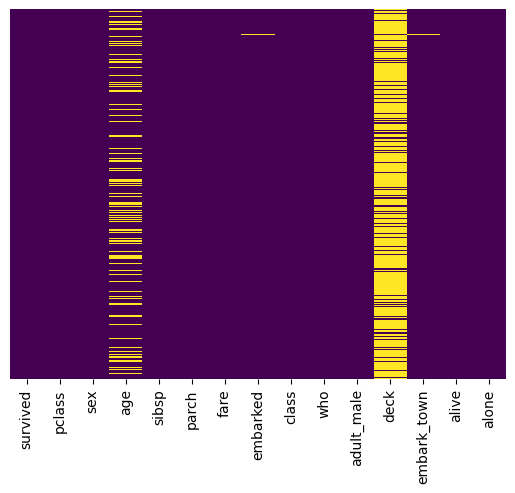

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
# redunate Information in alive und adult_male und embark_town
print(pd.crosstab(df['sex'], df['adult_male']))
print(pd.crosstab(df['alive'], df['survived']))
print(pd.crosstab(df['adult_male'], df['who']))
print(pd.crosstab(df['embarked'], df['embark_town']))

adult_male  False  True 
sex                     
female        314      0
male           40    537
survived    0    1
alive             
no        549    0
yes         0  342
who         child  man  woman
adult_male                   
False          83    0    271
True            0  537      0
embark_town  Cherbourg  Queenstown  Southampton
embarked                                       
C                  168           0            0
Q                    0          77            0
S                    0           0          644


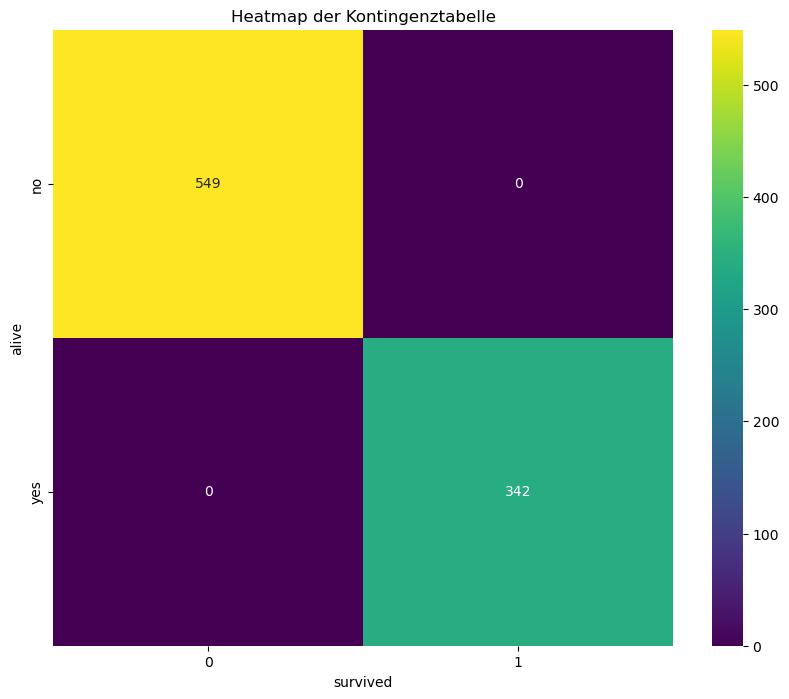

In [25]:
plt.figure(figsize=(10, 8))  # Festlegen der Größe des Plots
sns.heatmap(pd.crosstab(df['alive'], df['survived']), annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap der Kontingenztabelle')
plt.xlabel('survived')
plt.ylabel('alive')
plt.show()

In [26]:
df_clean = df.drop(['deck', 'alive', 'adult_male', 'embark_town'], axis=1)

<Axes: >

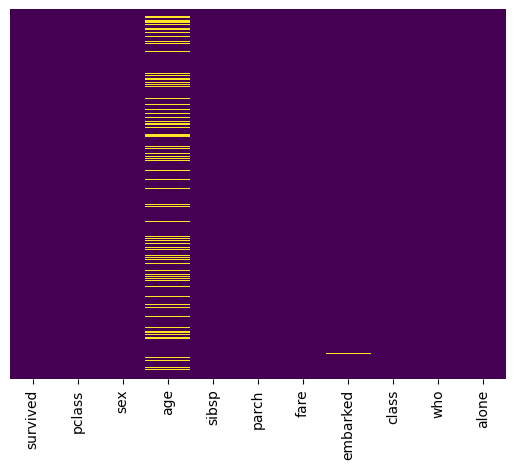

In [27]:
sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
# Ermitteln der kategorischen Variablen und deren Kardinalität im Seaborn Datensatz
titanic_cat = df_clean.select_dtypes(include=['object', 'category']).columns
cardinality = {col: df_clean[col].unique() for col in titanic_cat}
cardinality

{'sex': array(['male', 'female'], dtype=object),
 'embarked': array(['S', 'C', 'Q', nan], dtype=object),
 'class': ['Third', 'First', 'Second']
 Categories (3, object): ['First', 'Second', 'Third'],
 'who': array(['man', 'woman', 'child'], dtype=object)}

In [29]:
df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True


/Users/schoch/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Users/schoch/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


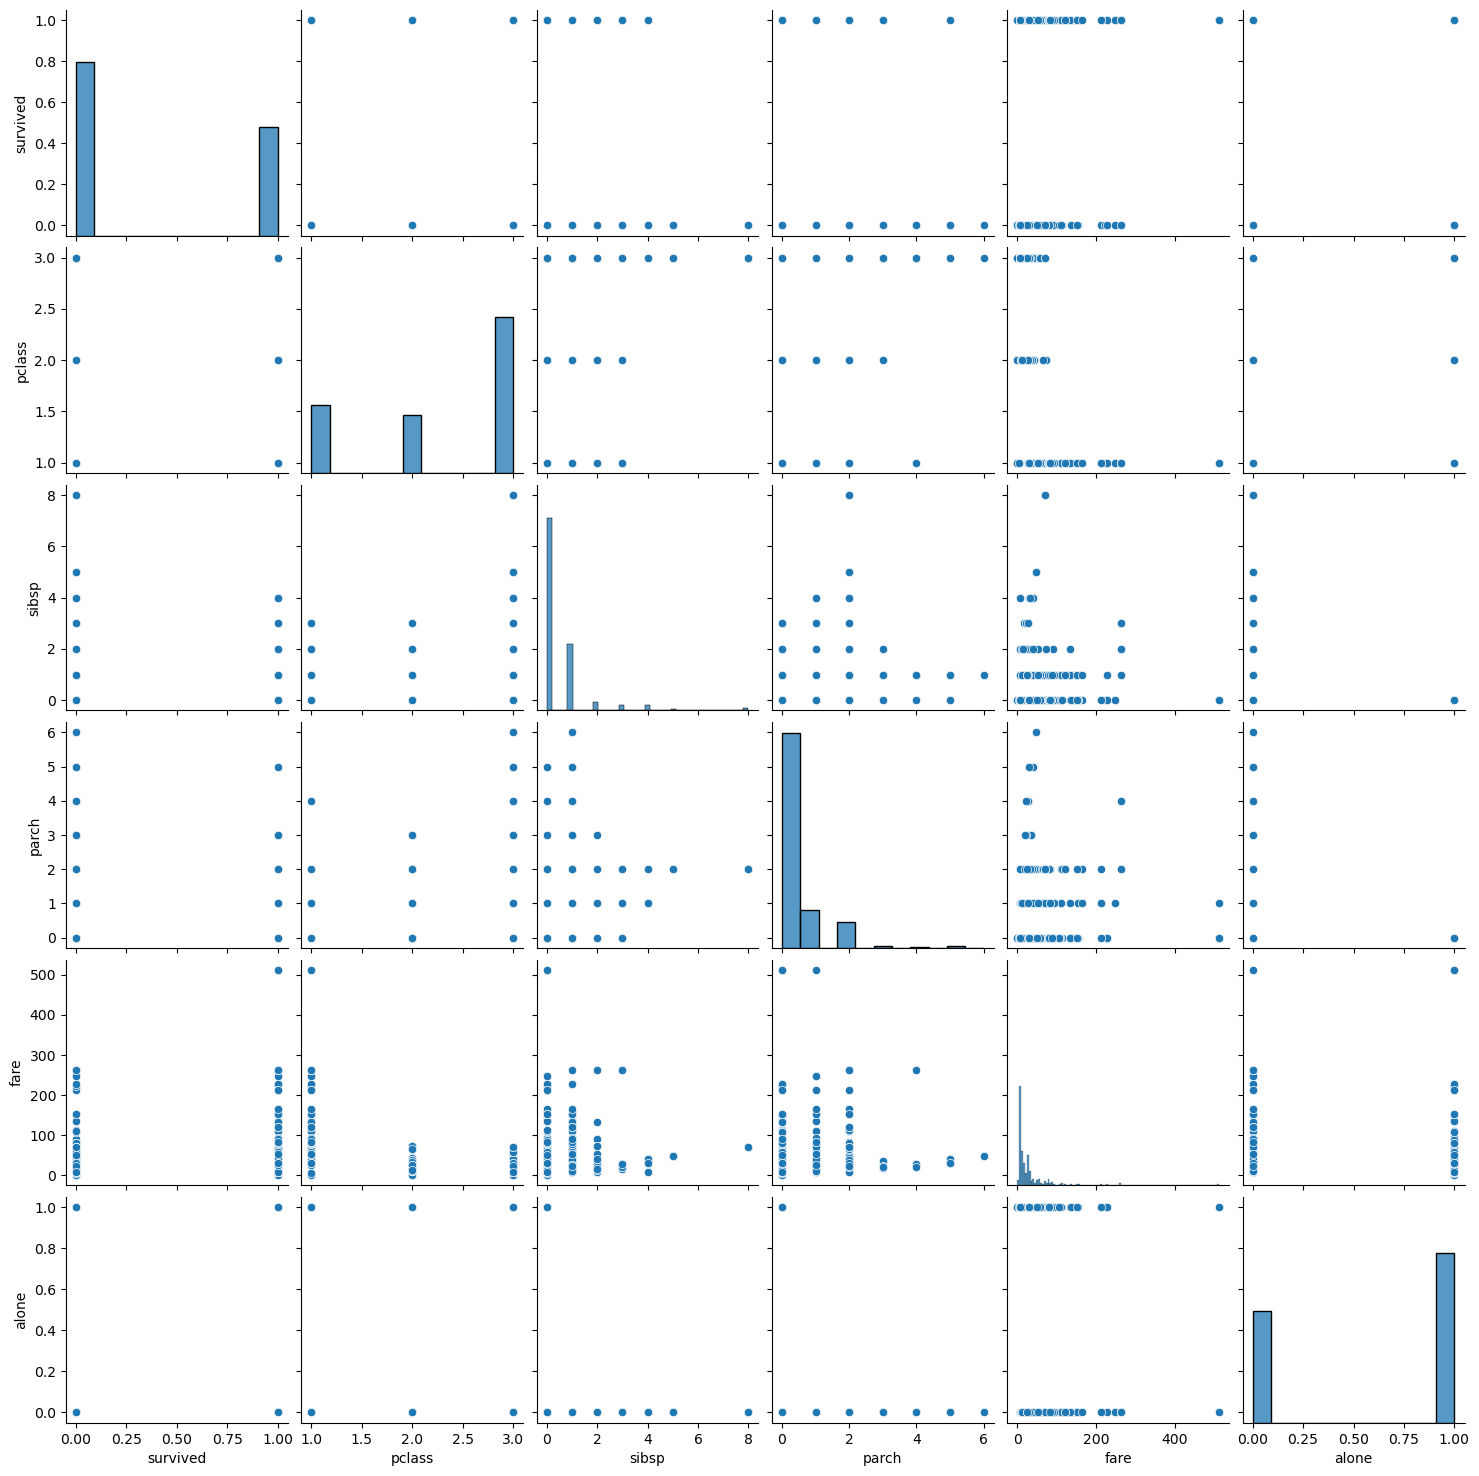

In [15]:
sns.pairplot(df_clean)

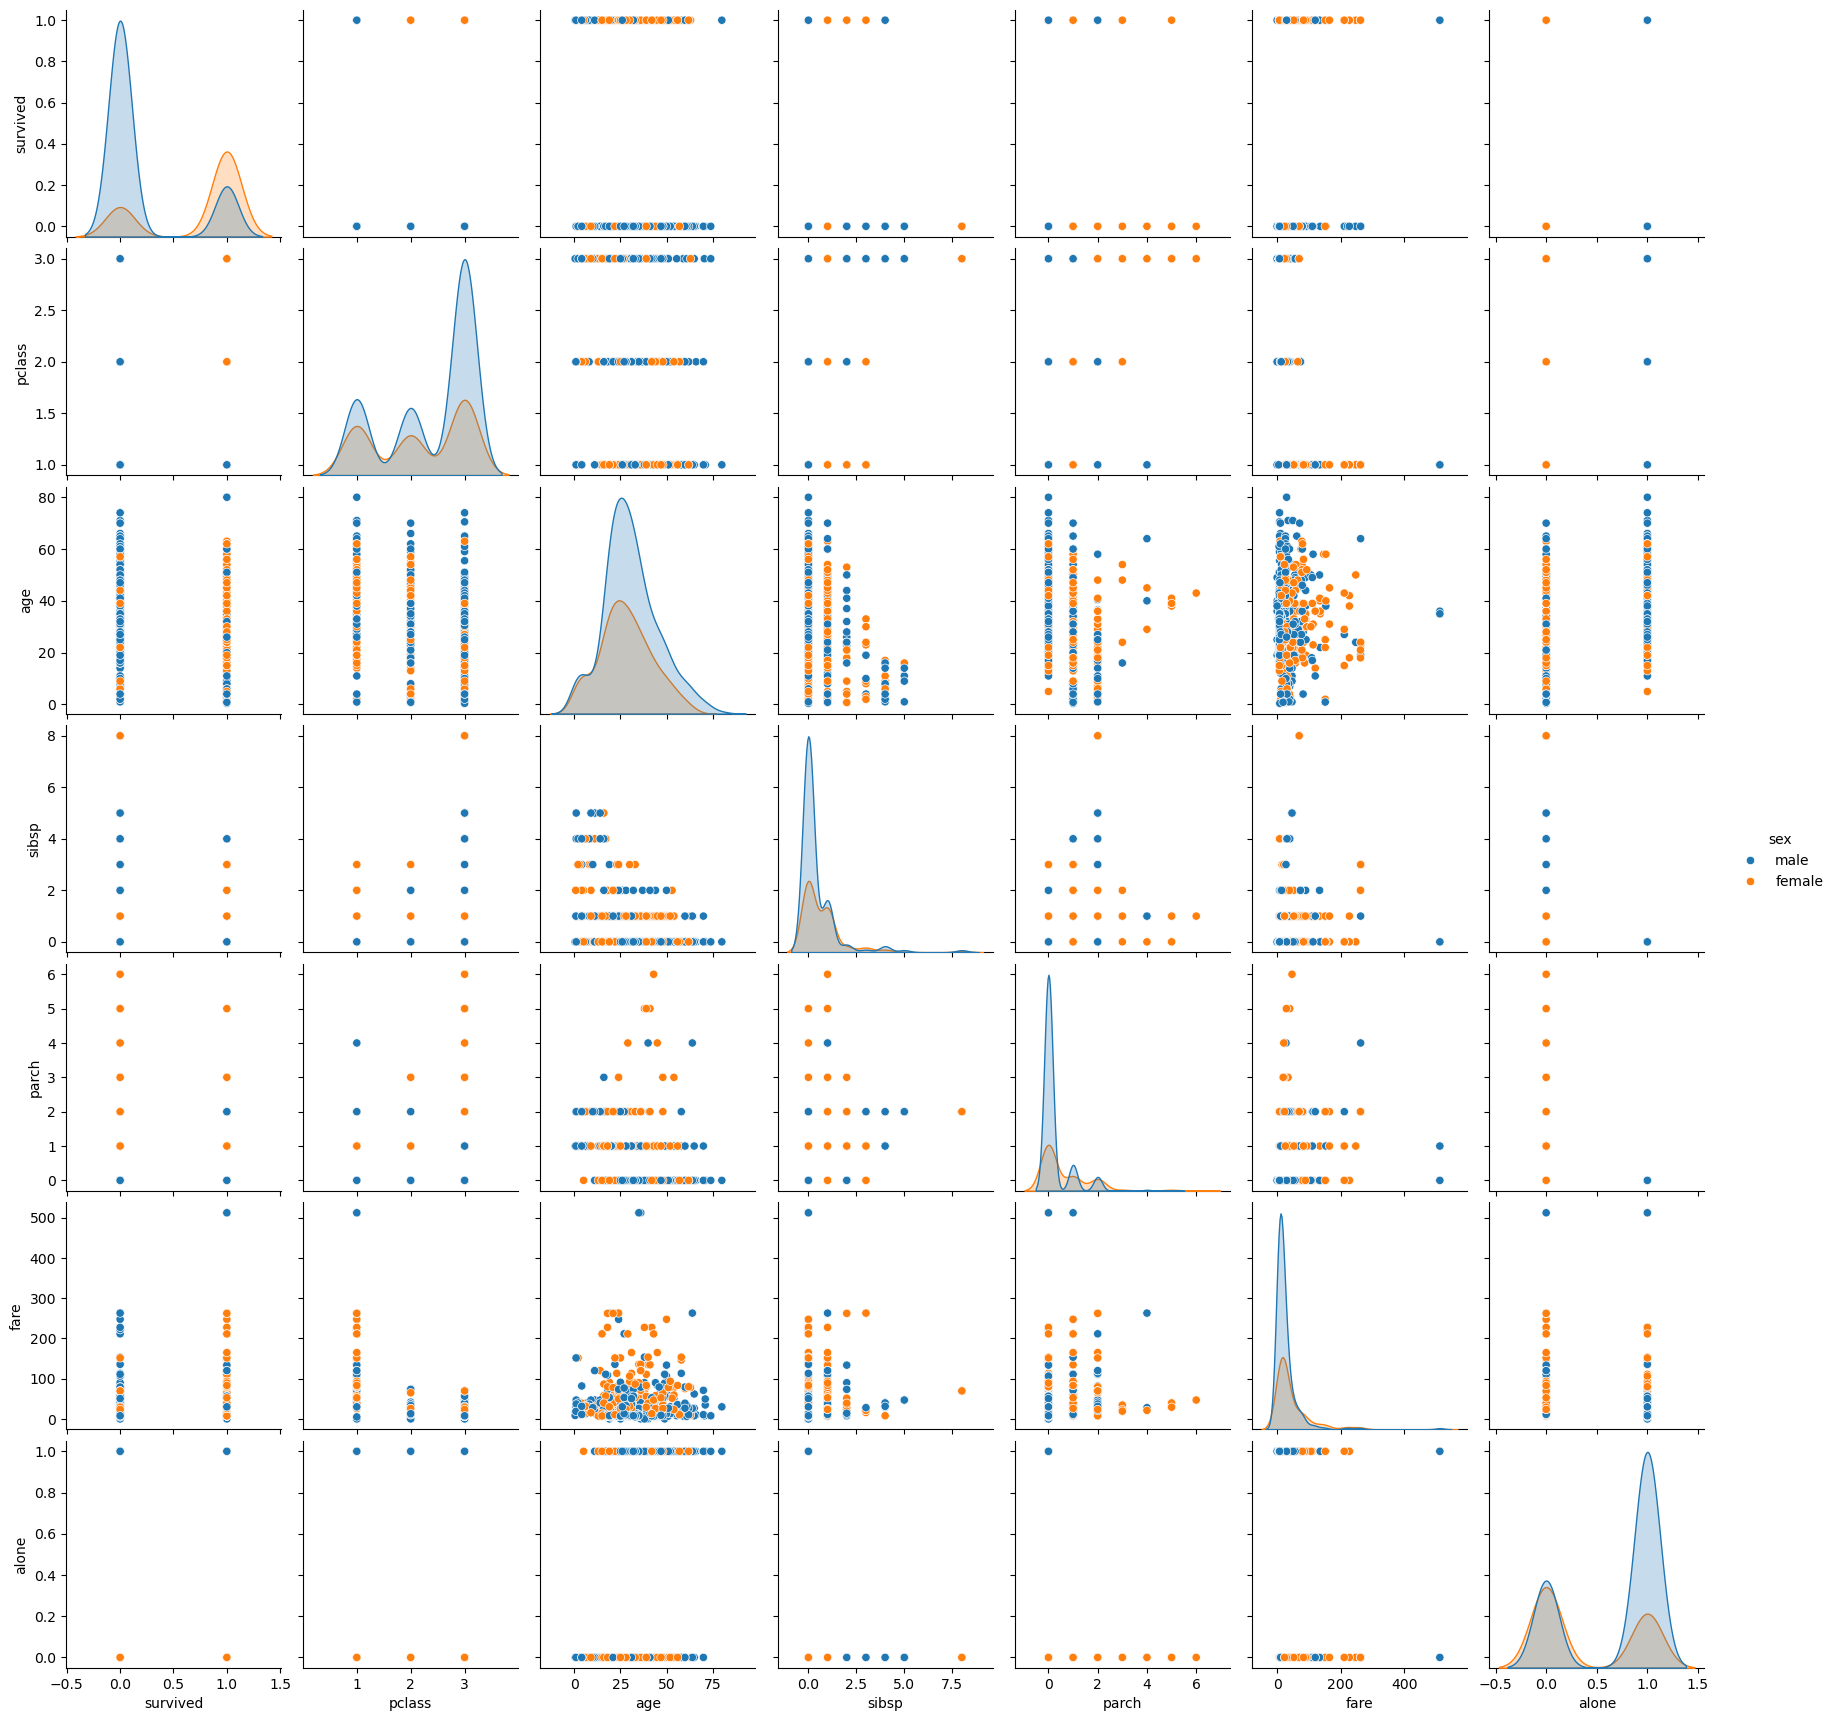

In [30]:
sns.pairplot(df_clean, hue = 'sex')

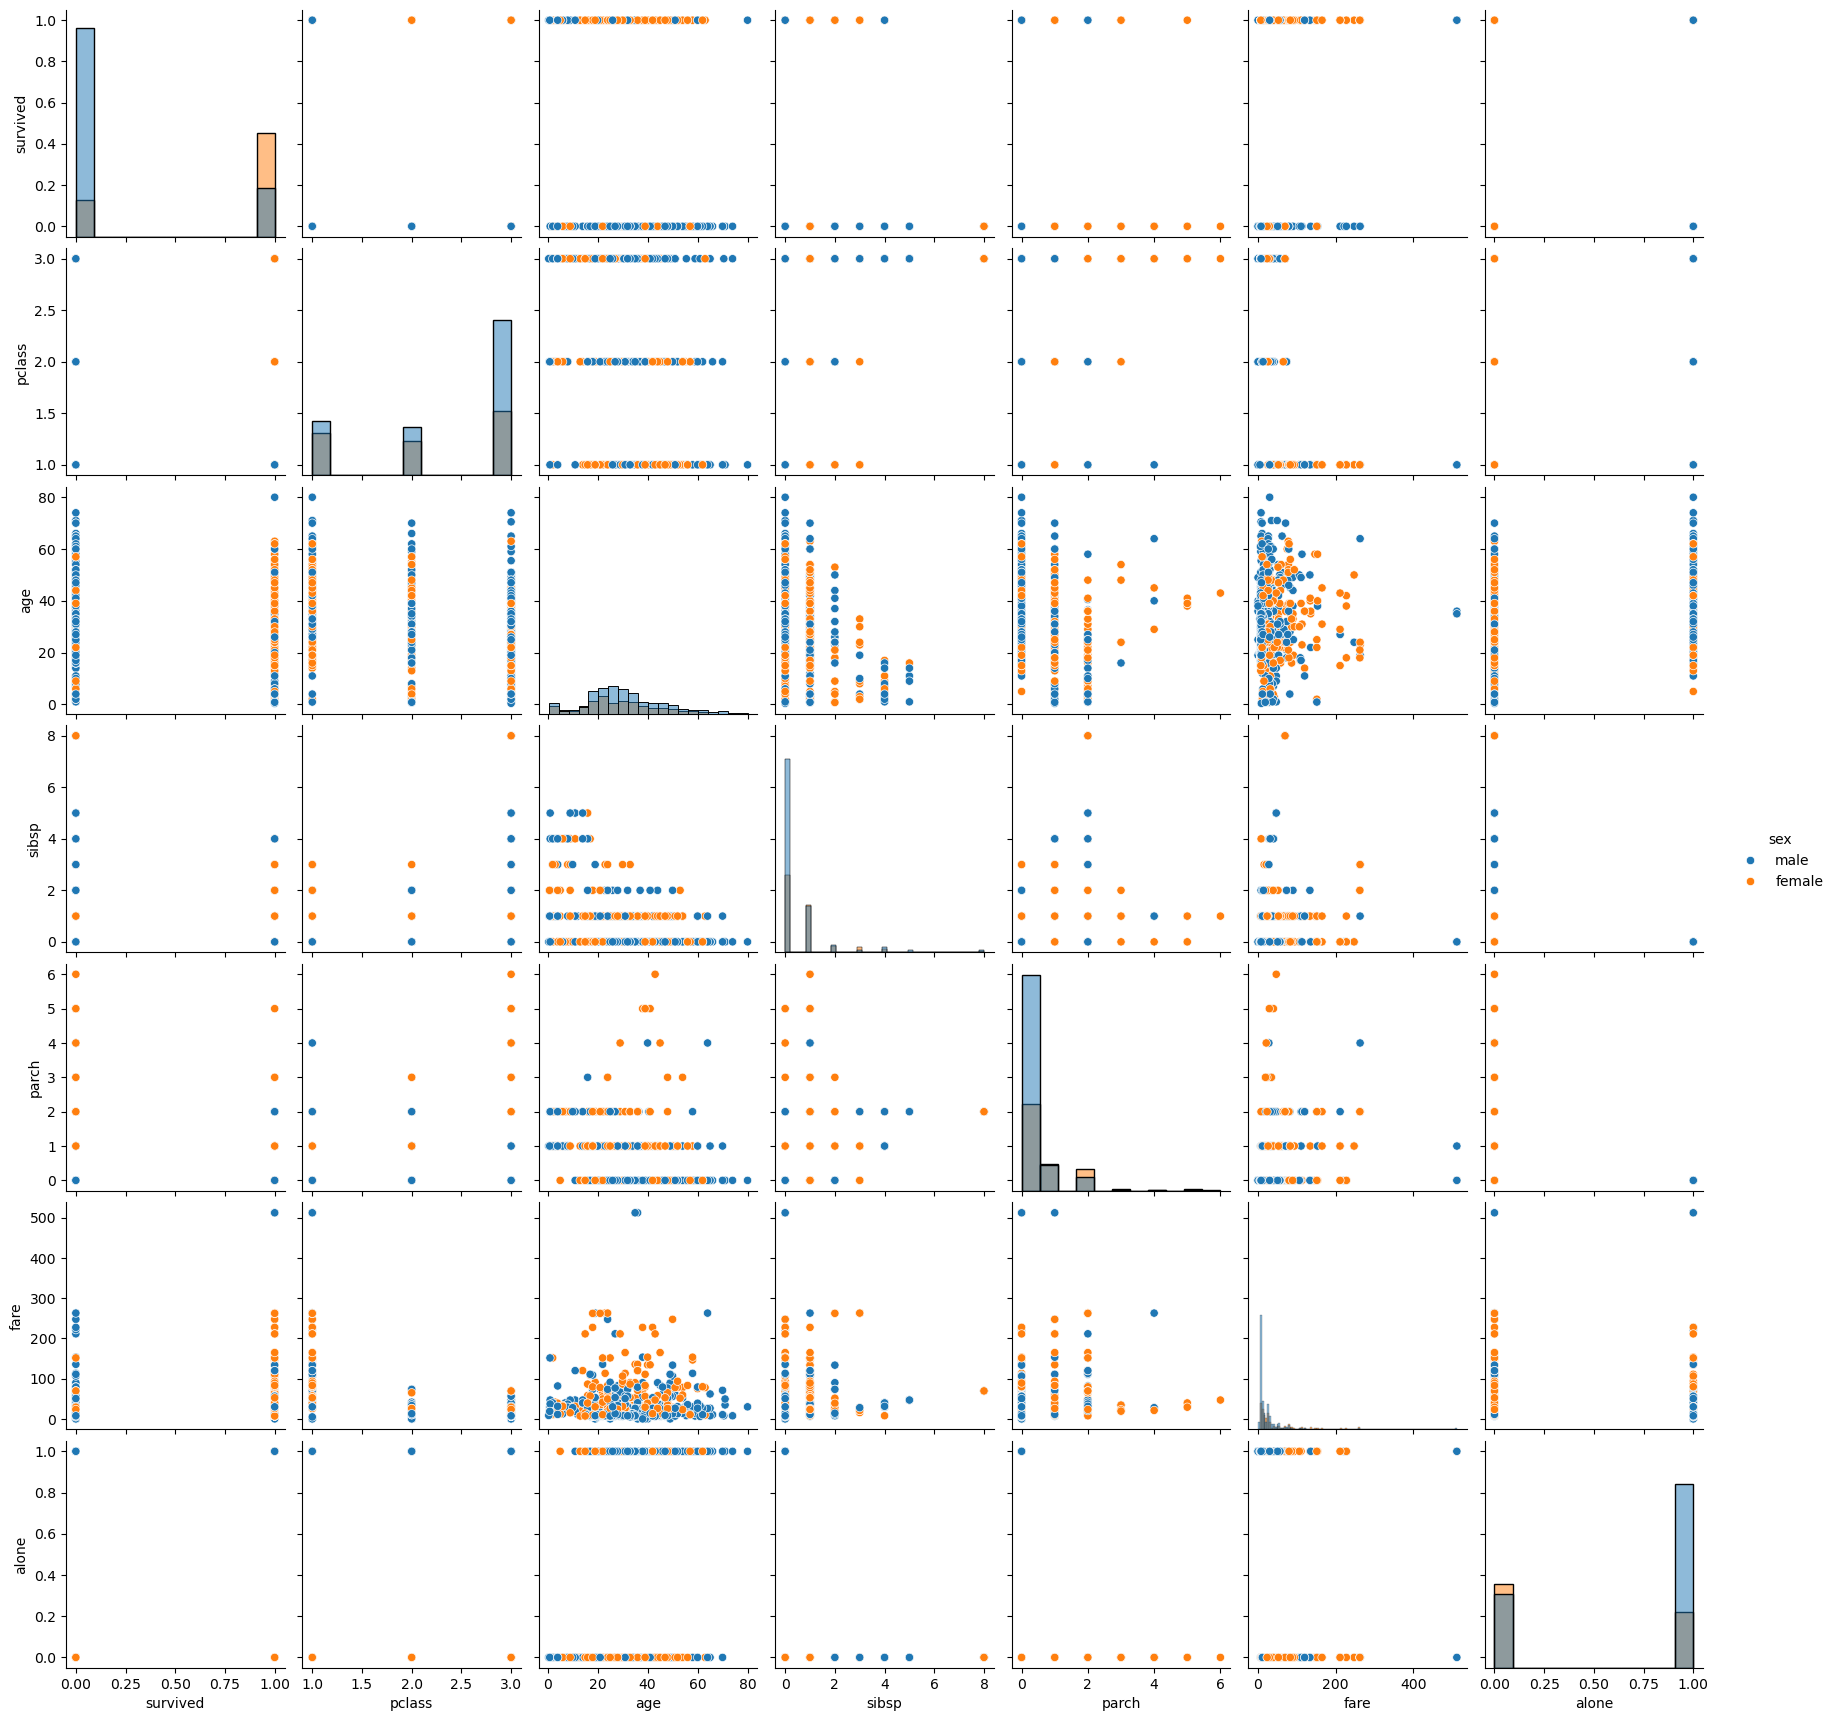

In [15]:
sns.pairplot(df_clean, hue="sex", diag_kind='hist')

In [31]:
# Erzeugen von Dummy Variablen je kategorischer Variablen
titanic_cat = df_clean.select_dtypes(include=['object', 'category']).columns

dummies = pd.get_dummies(df_clean[titanic_cat], drop_first=True)
dummies.head()

,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,True,False,True,False,True,True,False
1,False,False,False,False,False,False,True
2,False,False,True,False,True,False,True
3,False,False,True,False,False,False,True
4,True,False,True,False,True,True,False


# Regression Models

In [32]:
df_clean.head()

# Add a constant term to the model (intercept)
X = df_clean[['fare']].values
y = df_clean[['survived']].values
#X = sm.add_constant(df_clean['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'alone'])

# Create and train the regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Get the model parameters
intercept = reg_model.intercept_
coefficient = reg_model.coef_[0]
print(intercept)
print(coefficient)


[0.30269935]
[0.00251952]


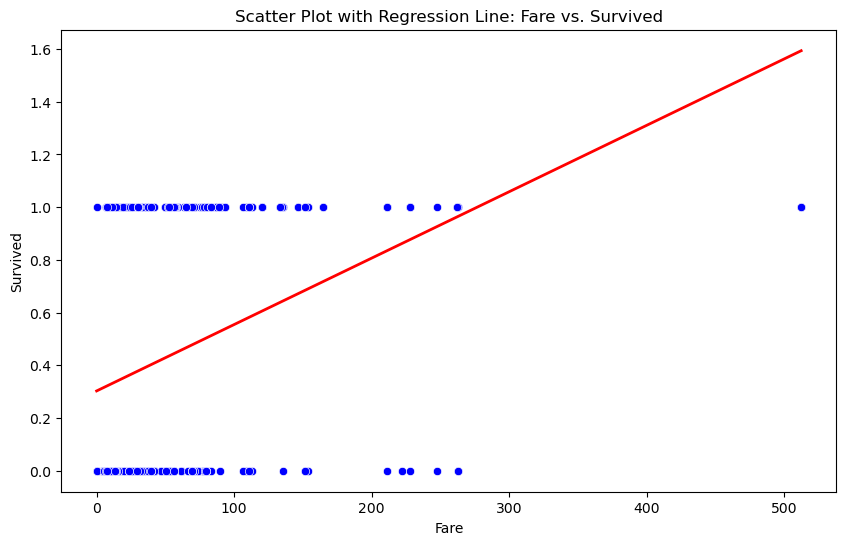

In [33]:
# Predict values for plotting the regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = reg_model.predict(x_range)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare', y='survived', data=df, color='blue')

# Add the regression line
plt.plot(x_range, y_pred, color='red', linewidth=2)

# Set the title and labels
plt.title('Scatter Plot with Regression Line: Fare vs. Survived')
plt.xlabel('Fare')
plt.ylabel('Survived')

# Show the plot
plt.show()

/opt/anaconda3/envs/DashEnv/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



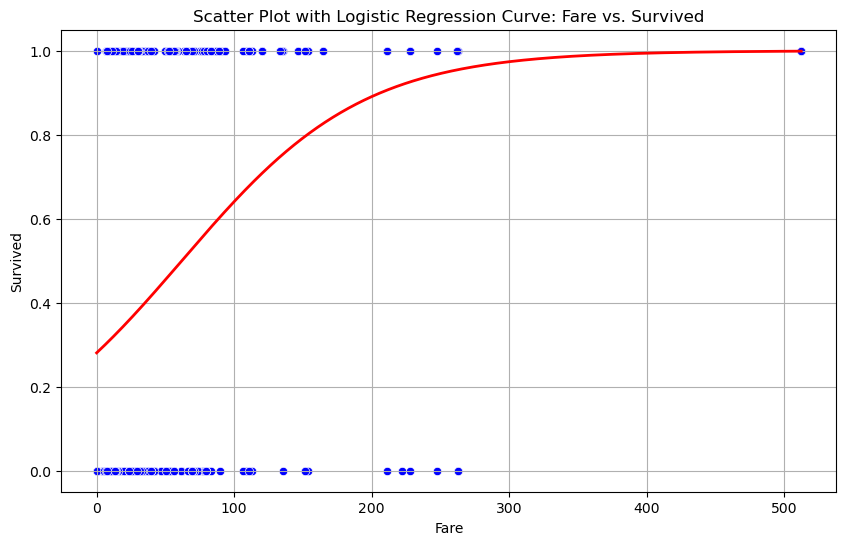

In [34]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X, y)

# Predict values for plotting the logistic regression curve
x_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_prob = log_reg_model.predict_proba(x_range)[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare', y='survived', data=df, color='blue')

# Add the logistic regression curve
plt.plot(x_range, y_prob, color='red', linewidth=2)

# Add grid
plt.grid(True)

# Set the title and labels
plt.title('Scatter Plot with Logistic Regression Curve: Fare vs. Survived')
plt.xlabel('Fare')
plt.ylabel('Survived')

# Show the plot
plt.show()

/opt/anaconda3/envs/DashEnv/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



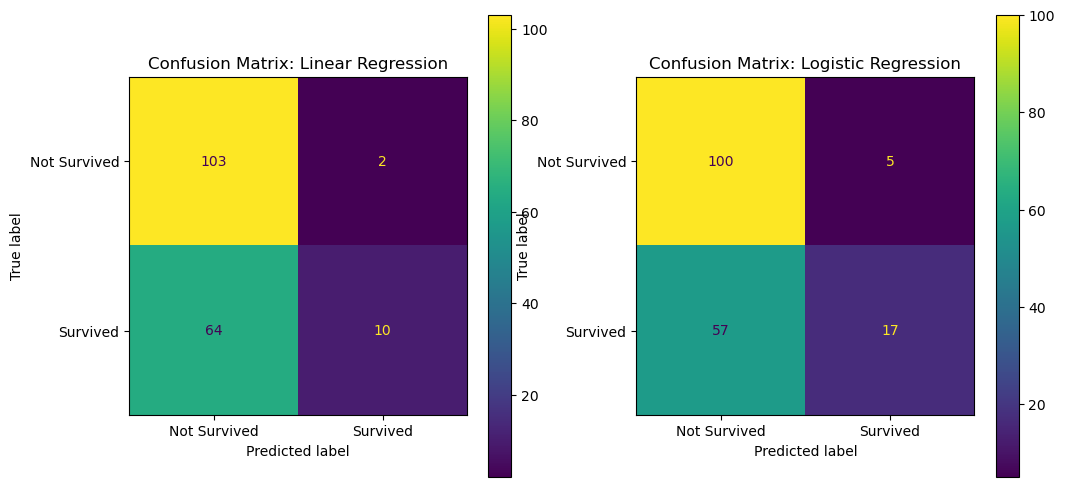

F1 Score (Linear Regression): 0.23
F1 Score (Logistic Regression): 0.35


In [35]:
# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Predict values for the test set using linear regression
y_pred_lin = lin_reg_model.predict(X_test)
y_pred_lin_class = (y_pred_lin >= 0.5).astype(int)

# Confusion Matrix for Linear Regression
cm_lin = confusion_matrix(y_test, y_pred_lin_class)
f1_lin = f1_score(y_test, y_pred_lin_class)

# Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Predict values for the test set using logistic regression
y_pred_log = log_reg_model.predict(X_test)

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Plotting Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix for Linear Regression
ConfusionMatrixDisplay(cm_lin, display_labels=['Not Survived', 'Survived']).plot(ax=axes[0])
axes[0].set_title('Confusion Matrix: Linear Regression')

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay(cm_log, display_labels=['Not Survived', 'Survived']).plot(ax=axes[1])
axes[1].set_title('Confusion Matrix: Logistic Regression')

plt.show()
# Print F1 Scores
print(f'F1 Score (Linear Regression): {f1_lin:.2f}')
print(f'F1 Score (Logistic Regression): {f1_log:.2f}')

# Decision Tree

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [43]:
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.811377245508982
Accuracy of Decision Tree-Test:  0.7130044843049327


[Text(0.4504374129526462, 0.9782608695652174, 'X[0] <= 10.825\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(0.12674094707520892, 0.9347826086956522, 'X[0] <= 7.404\ngini = 0.349\nsamples = 266\nvalue = [206, 60]'),
 Text(0.053481894150417826, 0.8913043478260869, 'X[0] <= 7.133\ngini = 0.206\nsamples = 60\nvalue = [53, 7]'),
 Text(0.03565459610027855, 0.8478260869565217, 'X[0] <= 7.013\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.026740947075208913, 0.8043478260869565, 'X[0] <= 6.962\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.017827298050139277, 0.7608695652173914, 'X[0] <= 2.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.008913649025069638, 0.717391304347826, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.026740947075208913, 0.717391304347826, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.03565459610027855, 0.7608695652173914, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04456824512534819, 0.8043478260869565, 'gini = 0.

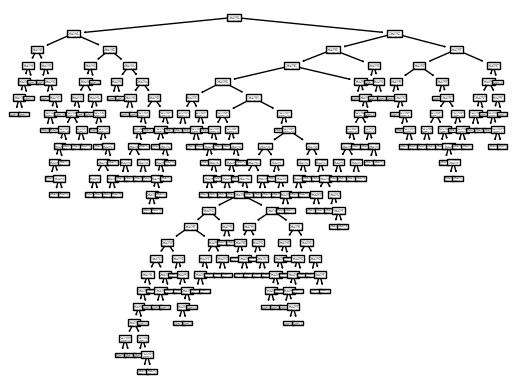

In [46]:
# Plot tree
tree.plot_tree(clf)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

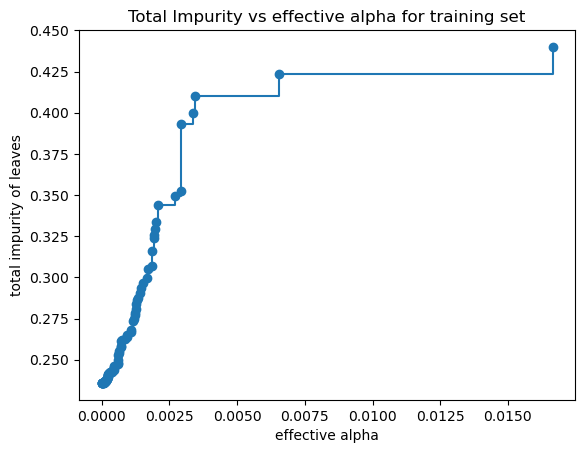

In [39]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [48]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.034160227722578484


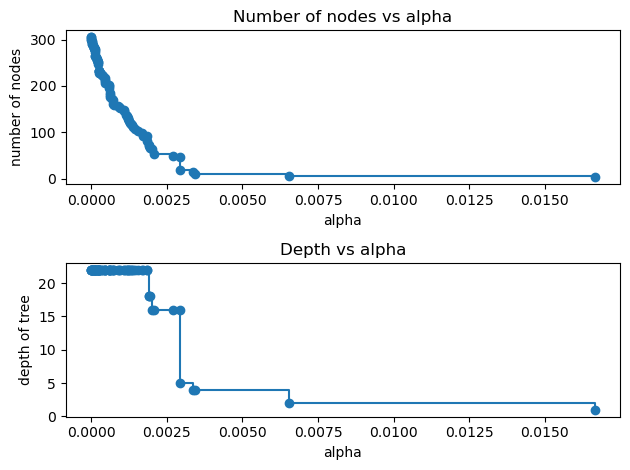

In [49]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

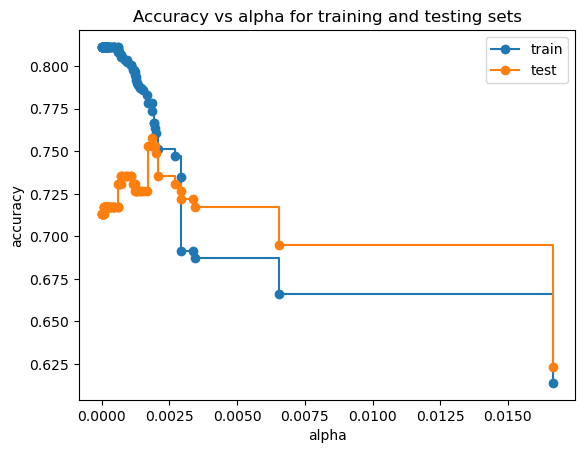

In [50]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Übersicht über den Datensatz
print(df_clean.head())

# Anzahl der Überlebenden und Verstorbenen
survived_counts = df_clean['survived'].value_counts()

# Diagramm 1: Überlebende vs. Verstorbene
fig1 = px.bar(survived_counts, x=survived_counts.index, y=survived_counts.values, 
              labels={'index': 'Überlebt', 'y': 'Anzahl'},
              title='Anzahl der Überlebenden vs. Verstorbenen')

# Diagramm 2: Überlebende nach Geschlecht
survived_sex = df_clean.groupby(['sex', 'survived']).size().reset_index(name='counts')
fig2 = px.bar(survived_sex, x='sex', y='counts', color='survived', 
              labels={'counts': 'Anzahl', 'Survived': 'Überlebt'},
              title='Überlebende nach Geschlecht')

# Diagramm 3: Altersverteilung
fig3 = px.histogram(df_clean, x='age', nbins=30, title='Altersverteilung')

# Diagramm 4: Überlebensrate nach Klasse
pclass_survived = df_clean.groupby(['pclass', 'survived']).size().reset_index(name='counts')
fig4 = px.bar(pclass_survived, x='pclass', y='counts', color='survived',
              labels={'Pclass': 'Klasse', 'counts': 'Anzahl', 'Survived': 'Überlebt'},
              title='Überlebensrate nach Klasse')

# Diagramm 5: Ticketpreise nach Klasse
fig5 = px.box(df_clean, x='pclass', y='fare', title='Ticketpreise nach Klasse')

# Subplots erstellen
fig = make_subplots(rows=3, cols=2, subplot_titles=('Anzahl der Überlebenden vs. Verstorbenen', 
                                                    'Überlebende nach Geschlecht', 
                                                    'Altersverteilung', 
                                                    'Überlebensrate nach Klasse', 
                                                    'Ticketpreise nach Klasse'))

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=2, col=1)
fig.add_trace(fig4['data'][0], row=2, col=2)
fig.add_trace(fig5['data'][0], row=3, col=1)

# Layout anpassen
fig.update_layout(height=900, width=1200, title_text="Titanic-Dashboard")

# Dashboard anzeigen
fig.show()


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  alone  
0    man  False  
1  woman  False  
2  woman   True  
3  woman  False  
4    man   True  


In [54]:
df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True
